
## Programming for Data Science

### Lecture 14: Classification in Machine Learning

### Instructor: Farhad Pourkamali 


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/ProgrammingForDataScience/blob/main/Lecture14_Classification.ipynb)


### Logistic regression
<hr style="border:2px solid gray">

* Logistic regression involves a probabilistic model of the form $p(y|\mathbf{x};\boldsymbol{\theta})$, where $\mathbf{x}\in\mathbb{R}^D$ is a fixed-dimensional input vector 
    * $C=2$: binary logistic regression $\rightarrow y\in\{0,1\}$ 
    * $C>2$: multinomial/multiclass logistic regression $\rightarrow y\in\{1,2,\ldots,C\}$
    
* Recall the pmf of the Bernoulli distribution 
$$Ber(y|\theta)=\begin{cases}\theta &\text{ if } y=1\\1-\theta &\text{ if } y=0\end{cases}=\theta^y(1-\theta)^{1-y}$$

* Binary logistic regression

$$p(y|\mathbf{x};\boldsymbol{\theta})=Ber(y|\color{red}{\sigma(f(\mathbf{x};\boldsymbol{\theta}))})$$

where the sigmoid or logistic function is defined as $\sigma(a):=\frac{1}{1+\exp(-a)}$


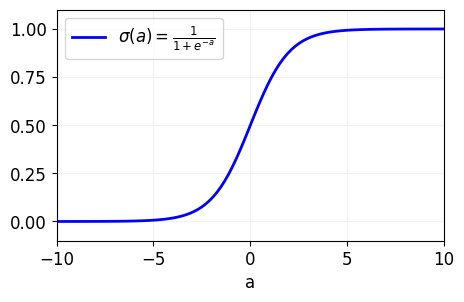

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 12, "figure.figsize": (5,3)})

a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) = \frac{1}{1 + e^{-a}}$")
plt.xlabel("a")
plt.legend(loc="upper left")
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.95')
plt.show()

### Properties of sigmoid function
<hr style="border:2px solid gray">

* The derivative of $\sigma(a)$ has a nice form

$$\begin{align}\sigma(a)&=\frac{1}{1+e^{-a}}=(1+e^{-a})^{-1}\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(1+e^{-a})'\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(-e^{-a})\\
\frac{d}{da}\sigma(a)&=\frac{1}{1+e^{-a}}\frac{e^{-a}}{1+e^{-a}}=\sigma(a)(1-\sigma(a))
\end{align}$$


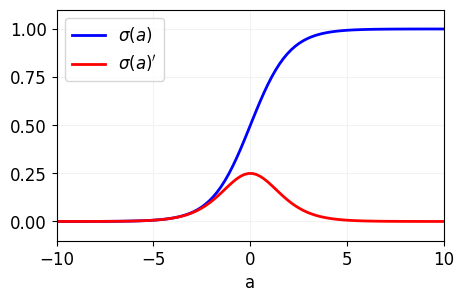

In [2]:
a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) $")
plt.plot(a, sig*(1-sig), "r-", linewidth=2, label=r"$\sigma(a)'$")
plt.xlabel("a")
plt.legend(loc="upper left")
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.95')
plt.show()

### Binary classification
<hr style="border:2px solid gray">

* Plugging the definition of the sigmoid function

$$p(y=1|\mathbf{x};\boldsymbol{\theta})=\sigma(a)=\frac{1}{1+e^{-a}}=\frac{e^a}{1+e^a}$$
$$p(y=0|\mathbf{x};\boldsymbol{\theta})=1-\sigma(a)=\frac{e^{-a}}{1+e^{-a}}=\frac{1}{1+e^a}$$

* The quantity $a$ is known as the log-odds or logit

$$\log\Big(\frac{p(y=1|\mathbf{x};\boldsymbol{\theta})}{p(y=0|\mathbf{x};\boldsymbol{\theta})}\Big)=\log\Big(e^a\Big)=a$$

* The inverse of the sigmoid function is called the *logit function*

$$\sigma^{-1}(p)=\log\big(\frac{p}{1-p}\big):=\text{logit}(p)$$

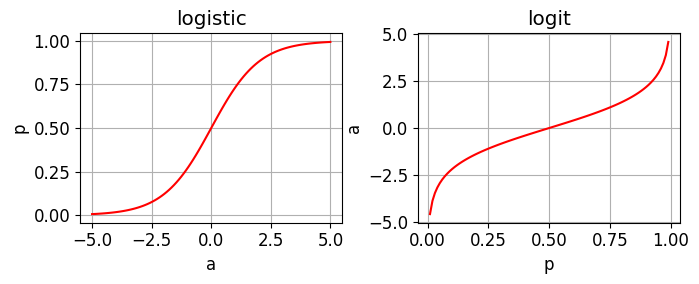

In [3]:
import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(7,3))

# expit 
x = np.linspace(-5, 5, 100)
ax[0].plot(x, expit(x), 'r')
ax[0].set_xlabel('a')
ax[0].set_ylabel('p')
ax[0].grid()
ax[0].set_title('logistic')

# logit 
x = np.linspace(0, 1, 100)
ax[1].plot(x, logit(x), 'r')
ax[1].set_xlabel('p')
ax[1].set_ylabel('a')
ax[1].grid()
ax[1].set_title('logit')

plt.tight_layout()
plt.show()

### Linear model for binary logistic regression
<hr style="border:2px solid gray">

* Use a linear function of the form $f(\mathbf{x};\boldsymbol{\theta})=\boldsymbol{\theta}^T\mathbf{x}$, yielding the following pmf

$$p(y|\mathbf{x};\boldsymbol{\theta})=Ber(y|\sigma(\boldsymbol{\theta}^T\mathbf{x}))$$

* Thus, we get 

$$p(y=1|\mathbf{x};\boldsymbol{\theta})=\sigma(\boldsymbol{\theta}^T\mathbf{x})=\frac{1}{1+\exp(-\boldsymbol{\theta}^T\mathbf{x})}$$



### Loss function
<hr style="border:2px solid gray">

* Logistic regression model estimates probabilities and makes predictions. But how is it trained?

* Let us define $\mu_n=\sigma(a_n)$ and $a_n=\boldsymbol{\theta}^T\mathbf{x}_n$

$$l(y_n,\mu_n)=\text{H}_{ce}(y_n,\mu_n)=\begin{cases}-\log(\mu_n) & \text{ if } y_n=1 \\ -\log(1-\mu_n) &\text{ if } y_n=0\end{cases}$$

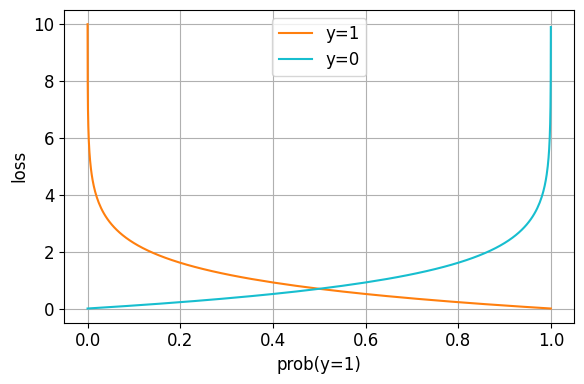

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.special import expit

def cross_entropy_loss(y, mu):
    if y == 1:
        return -np.log(mu)
    else:
        return -np.log(1 - mu)

z = np.arange(-10, 10, 0.1)
mu_z = expit(z)

cost_1 = cross_entropy_loss(1, mu_z) # when y = 1
cost_0 = cross_entropy_loss(0, mu_z) # when y = 0 

fig, ax = plt.subplots(figsize=(6,4))
plt.plot(mu_z, cost_1, 'C1-', label='y=1')
plt.plot(mu_z, cost_0, 'C9-', label='y=0')
plt.xlabel('prob(y=1)')
plt.ylabel('loss')
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

### Logistic regression in scikit-learn (sklearn)
<hr style="border:2px solid gray">

* First, you need to import the `LogisticRegression` class from the `linear_model` module in scikit-learn.

```
from sklearn.linear_model import LogisticRegression

```
* Next, you initialize a `LogisticRegression` object. This step allows you to specify various parameters, such as the regularization strength (C), the solver to use for optimization, and the maximum number of iterations the solver performs.

```
model = LogisticRegression()

```

* Fitting the model involves adjusting the weights to minimize the cost function using the training data. This is done using the `.fit()` method.
```
model.fit(X_train, y_train)

```

* After the model has been fitted, you can use it to make predictions on new data using the `.predict()` method for class labels, or `.predict_proba()` for probabilities of each class.

```
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

```

* You can evaluate the performance of your model using various metrics such as accuracy, precision, and recall.

```
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

```

### Confusion matrix 
<hr style="border:2px solid gray">

* Each row in a confusion matrix represents an actual class, while each column represents a predicted class

    * The first row of this matrix considers the negative class or $y=0$
    * The second row considers the positive class or $y=1$
    
    <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/confusion_matrix.png?raw=true\" width=350>
    

In [5]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

list(iris)


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
iris['data'] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

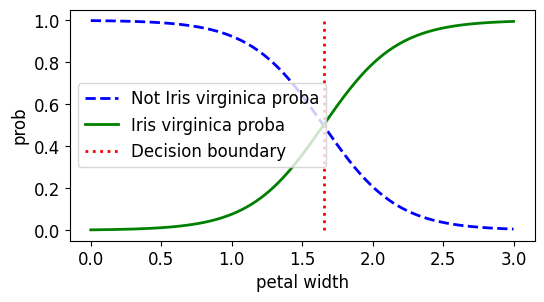

In [10]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(6, 3))  
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "r:", linewidth=2,
         label="Decision boundary")
plt.xlabel('petal width')
plt.ylabel('prob')
plt.legend()
plt.show()

In [11]:
log_reg.predict_proba(X_test[:5])

array([[0.84931999, 0.15068001],
       [0.9944147 , 0.0055853 ],
       [0.07651009, 0.92348991],
       [0.64069097, 0.35930903],
       [0.72352248, 0.27647752]])

In [12]:
log_reg.predict(X_test[:5])

array([False, False,  True, False, False])

### HW 14

1. The Iris flower dataset is a famous dataset that includes 150 samples of Iris flowers, each with four features. Each sample is labeled as one of three species: Setosa, Versicolor, or Virginica.

Load the Iris dataset. You can use `sklearn.datasets.load_iris()` to load the data directly into your environment. Split the dataset into features ($\mathbf{X}$) and target labels ($\mathbf{y}$). Use `train_test_split` from `sklearn.model_selection` to split your data into a training set and a testing set. A common split ratio is 70% for training and 30% for testing.

Initialize a `LogisticRegression` model from `sklearn.linear_model`. Fit the model to the training data. Use the trained model to make predictions on the testing set.
Evaluate the model's performance by calculating metrics such as accuracy, precision, and recall. 


2. In this problem, we use the "breast cancer wisconsin dataset" from scikit-learn for training and evaluating classification models (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The dataset comprises 30 features (mean radius, mean texture, mean perimeter, etc.) and a target variable or class.

Import this dataset from scikit-learn to form the input data matrix $\mathbf{X}$ and the target vector $\mathbf{y}$. What is the sample size? How many different classes do we have in this problem?

Split the dataset by using the function train_test_split() with 70% training data.

Build a logistic regression model to predict classes for the testing data.

Evaluate the model's performance by calculating metrics such as accuracy, precision, and recall. 


3. In this assignment, we explore the impact of using 5 different probability thresholds for classifying a sample as malignant or positive in the "breast cancer wisconsin dataset" and analyze the trade-off between precision and recall at these thresholds.

Simiar to the previous problem, import this dataset from scikit-learn to form the input data matrix $\mathbf{X}$ and the target vector $\mathbf{y}$. Split the dataset by using the function train_test_split() with 70% training data. Train a logistic regression model using the training dataset.

Choose 5 different probability thresholds for classifying a sample as malignant (e.g., 0.5, 0.6, 0.7, 0.8, and 0.9). For each threshold:
* Use the `.predict_proba()` method of your logistic regression model to get the probability estimates for each sample in the test set.
* Classify each sample as malignant if its probability of being malignant is greater than the current threshold.

For each of the 5 thresholds, calculate precision and recall using your custom classifications and the true labels from the test set. Create a plot to summarize the precision and recall values at each of the 5 thresholds. Analyze the trade-off between precision and recall as the threshold varies. Discuss why these trade-offs occur.